# BGS comparison with Analytical Data from julia

In [1]:
import sys
import os
sys.path.append("../../../../src/")
#Imports
import numpy as np
import scipy as sp
import numpy.linalg as la
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, scatter
#Custom made imports
import single_particle_sector as sps
import thermal_expectations_BGS as th
from time import time

In [2]:
L = 50
J = -1
h = 1
beta = 10
p = [0,1]
args = (L,J,h)
G= th.G_th(p,beta,args)

In [3]:
#Fixed Betas, variable l
betas = np.array([0,3,5])
h_i = np.linspace(0,2,100)
n = [i for i in range(2,4)]
p = [1]
L = 50
J = -1
P_beta = []
for beta in betas:
    dat = []
    for h in h_i:
        args = (L,J,h)
        G = th.G_th(p,beta,args)
        P = [sps.P_n(ns,G,L) for ns in n]
        dat.append(P)
    P_beta.append(dat)
P_beta = np.array(P_beta) #shape(beta,h,n)


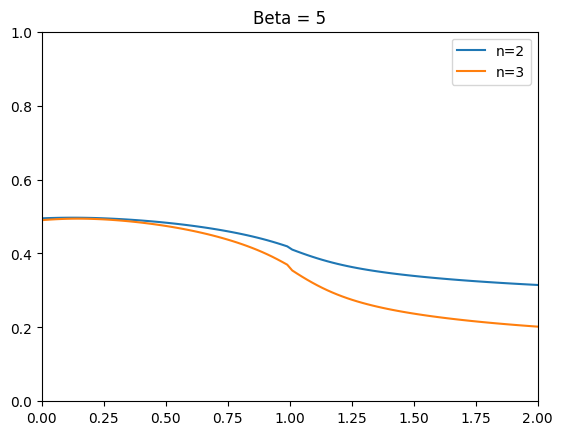

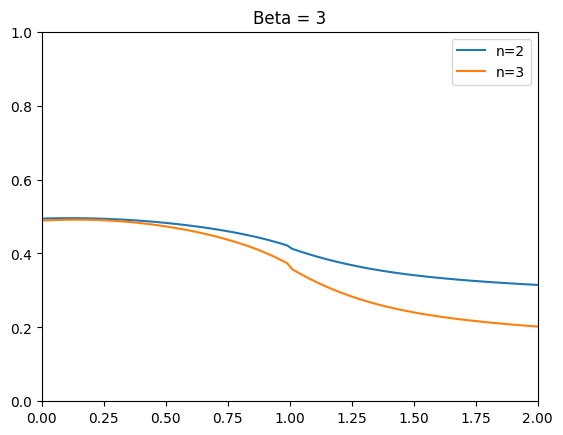

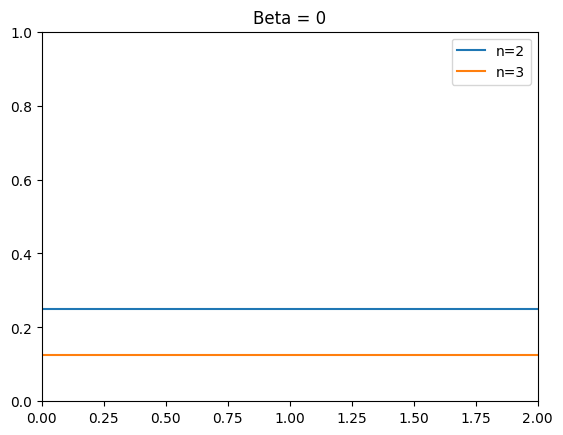

In [4]:
for b in range(len(betas)):
    b = -b-1
    plt.figure()
    for ni in range(len(n)):

        plot(h_i,P_beta[b,:,ni],label=f"n={n[ni]}" )
        plt.title(f"Beta = {betas[b]}")
    plt.xlim(h_i[0],h_i[-1])
    plt.legend()
    plt.ylim(0,1)
    plt.show()

In [5]:
from matplotlib.pyplot import plot
import pandas as pd

In [6]:
df1 = pd.read_csv("/Users/kristianmunnikhuis/Desktop/subsystem_loschmidt_echo/results/thermal_averages/L=100_n=2_TFIM_thermal_average.txt", delimiter="\t", header=None, skiprows=1,engine="python")
df2 = pd.read_csv("/Users/kristianmunnikhuis/Desktop/subsystem_loschmidt_echo/results/thermal_averages/L=100_n=3_TFIM_thermal_average.txt", delimiter="\t", header=None, skiprows=1,engine="python")
h = df1.iloc[0]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kristianmunnikhuis/Desktop/subsystem_loschmidt_echo/results/thermal_averages/L=100_n=2_TFIM_thermal_average.txt'

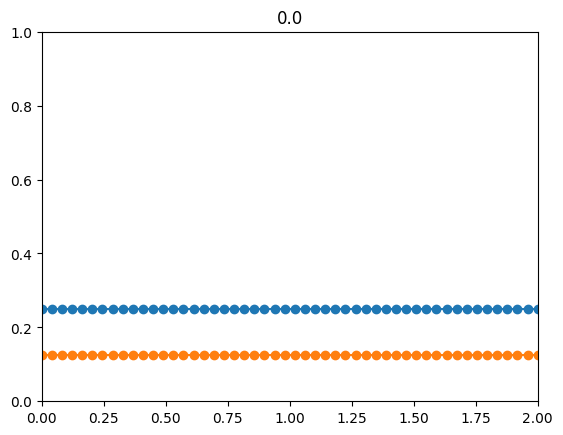

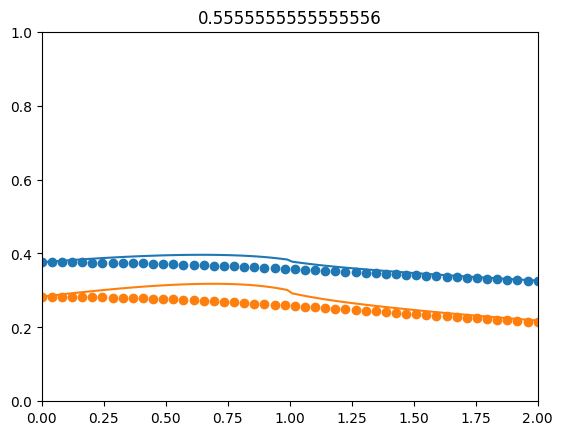

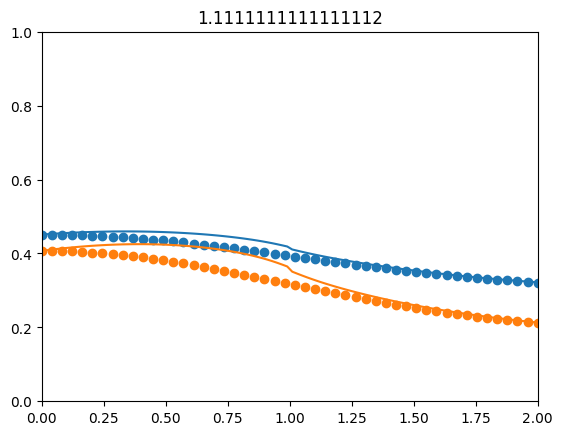

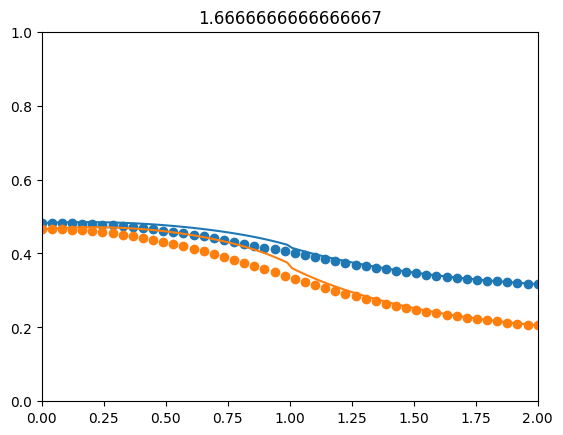

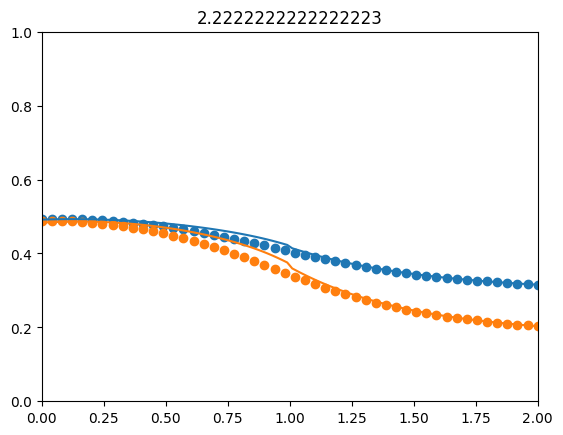

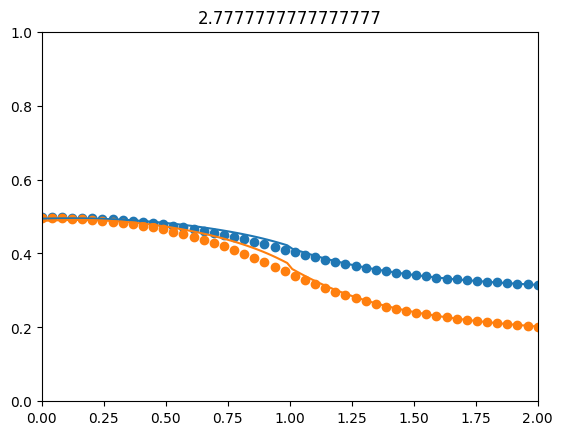

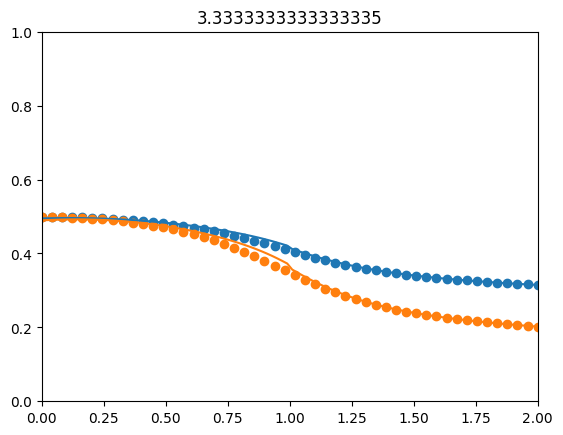

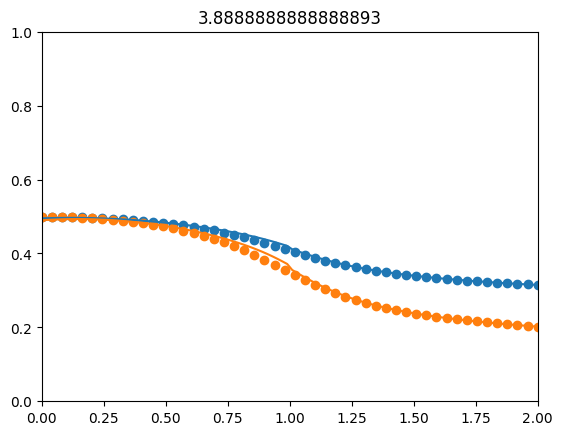

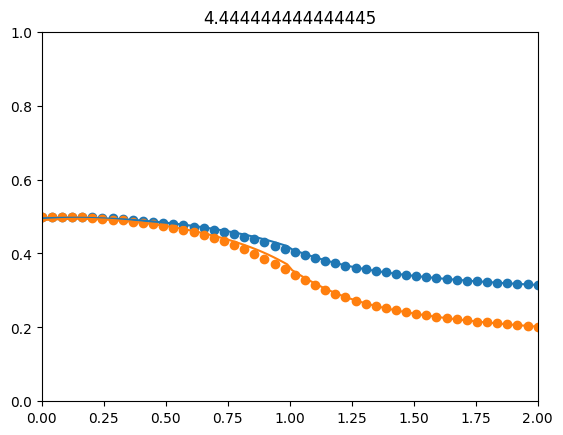

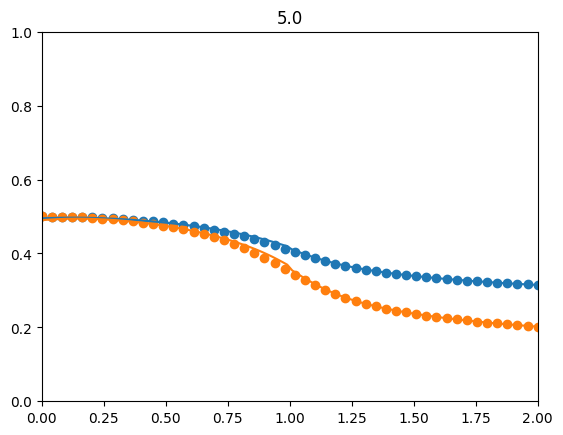

In [27]:
for b in range(len(betas)):
    plt.figure()
    scatter(h,df1.iloc[b+1])
    scatter(h,df2.iloc[b+1])

    plot(h_i,P_beta[b,:,0])
    plot(h_i,P_beta[b,:,1])
    plt.title(betas[b])
    plt.xlim(0,2)
    plt.ylim(0,1)